In [1]:
import os
os.getcwd()

'/home/ksh/workspace'

In [3]:
import pickle
with open("./road_accident.pkl", 'rb') as f:
    road_acc = pickle.load(f)

In [1]:
import pandas as pd

# 컬럼 수 전체 보기
pd.set_option('display.max_columns', None)

In [5]:
pd.DataFrame(road_acc)

,JIJACE_NM,CHISA,ACC_HUM,SIDO_CD,GUBUN_NM,SLTWD_CNT,SERI_ACC,SIDO_NM,AC_MODE,CRT_JIJACE_CD,BASE_NAME,BIG_CNT,PSGT_CNT,WND_ACC,ACC_CNT,TRK_CNT,DEATH_CNT,BASE_CODE,WND_CNT,DEATH_ACC,GUBUN,SERI_CNT,SLTWD_ACC,YEAR,BASE_CATEGORY
0,강남구,0.39,787,11000,승용,602,115,서울,A,11680,교차로안,0,0,19,507,0,2,01,49,2,01,134,371,2018,도로형태
1,강남구,0.00,19,11000,승합,14,5,서울,A,11680,교차로안,0,0,0,15,0,0,01,0,0,02,5,10,2018,도로형태
2,강남구,0.00,28,11000,화물,18,3,서울,A,11680,교차로안,0,0,2,20,1,0,01,6,0,03,4,15,2018,도로형태
3,강남구,0.00,1,11000,특수,1,0,서울,A,11680,교차로안,0,0,0,1,0,0,01,0,0,04,0,1,2018,도로형태
4,강남구,4.35,58,11000,이륜,39,8,서울,A,11680,교차로안,0,0,7,46,0,2,01,8,2,05,9,29,2018,도로형태
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6348,중랑구,0.00,5,11000,이륜,4,1,서울,A,11260,기타,0,0,0,5,0,0,99,0,0,05,1,4,2022,도로형태
6349,중랑구,0.00,1,11000,원동기,1,0,서울,A,11260,기타,0,0,0,1,0,0,99,0,0,06,0,1,2022,도로형태
6350,중랑구,0.00,16,11000,자전거,8,7,서울,A,11260,기타,0,0,1,16,0,0,99,1,0,07,7,8,2022,도로형태
6351,중랑구,0.00,2,11000,개인형이동수단(PM),1,1,서울,A,11260,기타,0,0,0,2,0,0,99,0,0,12,1,1,2022,도로형태


In [7]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import font_manager, rc 
import matplotlib.font_manager as fm

/home/ksh/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ksh/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ksh/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ksh/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ksh/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ksh

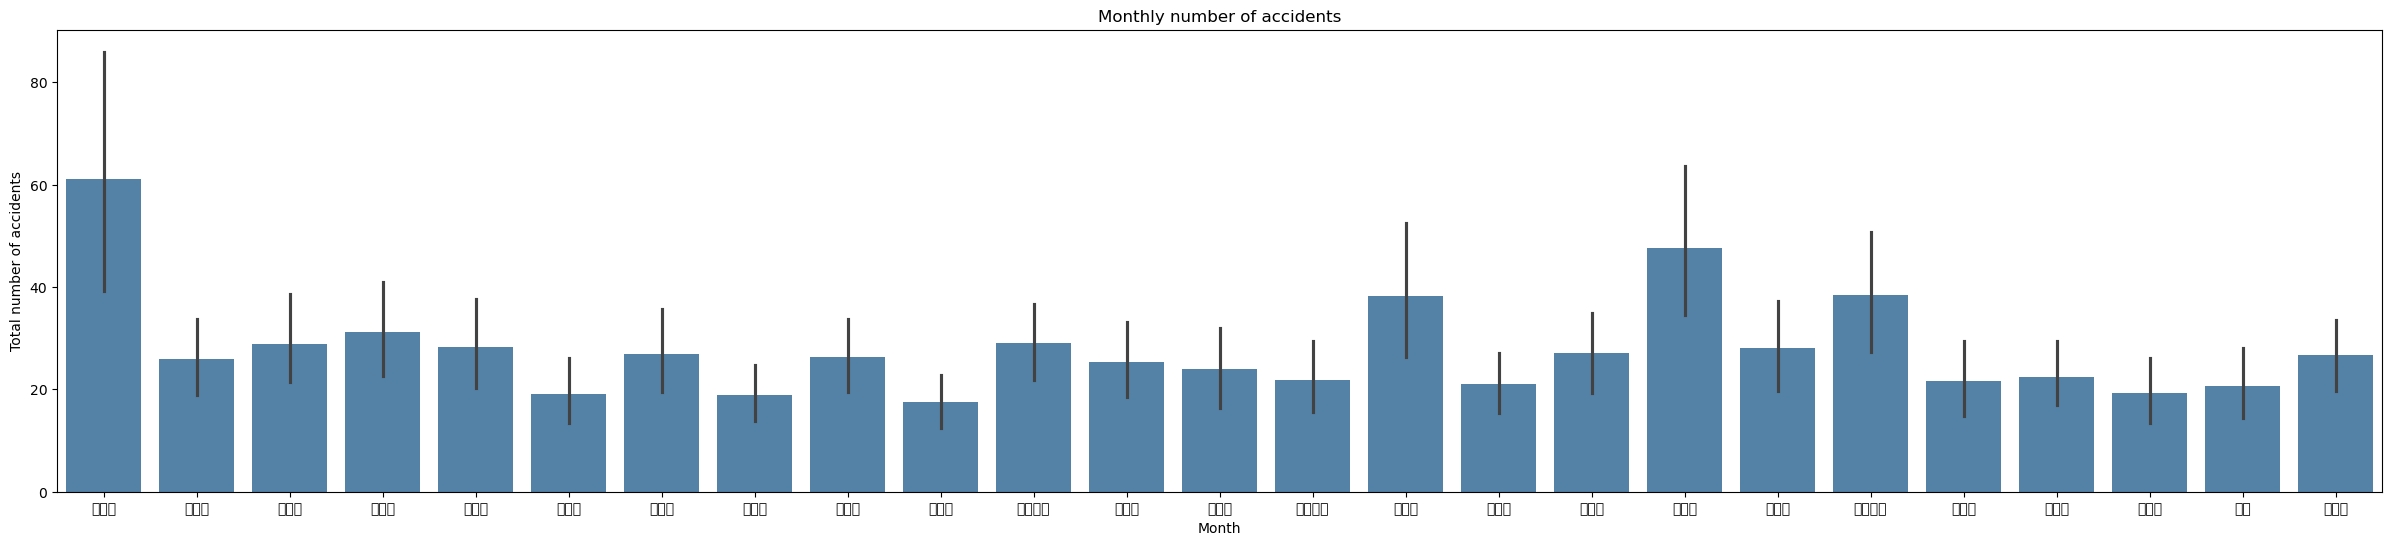

In [9]:
import seaborn as sns
plt.figure(figsize=(30,6))
sns.barplot(x=road_acc['JIJACE_NM'], y=road_acc['ACC_CNT'], color='steelblue')
plt.title('Monthly number of accidents')
plt.xlabel('Month')
plt.ylabel('Total number of accidents')
plt.show()

In [10]:
# road_acc['JIJACE_NM']

road_grp = pd.DataFrame(road_acc.groupby(['JIJACE_NM', 'YEAR'],as_index=False)['ACC_CNT'].sum())

In [12]:
road_grp

,JIJACE_NM,YEAR,ACC_CNT
0,강남구,2018,3459
1,강남구,2019,3722
2,강남구,2020,3752
3,강남구,2021,3820
4,강남구,2022,3709
...,...,...,...
120,중랑구,2018,1565
121,중랑구,2019,1620
122,중랑구,2020,1447
123,중랑구,2021,1373


In [11]:
road_grp2 = road_grp.groupby('JIJACE_NM',as_index=False)['ACC_CNT'].sum()

In [14]:
road_grp2.head(3)

,JIJACE_NM,ACC_CNT
0,강남구,18462
1,강동구,6298
2,강북구,5641


In [15]:
# len(road_grp2['JIJACE_NM'])
road_grp2['ACC_CNT'].count()

25

In [16]:
road_grp2['ACC_CNT'][0]

18462

In [59]:

for attribute, measurement in road_grp2['ACC_CNT'].items():
    print(f"{attribute} / {measurement}")
    


0 / 18462
1 / 6298
2 / 5641
3 / 8013
4 / 6698
5 / 4580
6 / 7010
7 / 4333
8 / 7531
9 / 3530
10 / 7636
11 / 6490
12 / 6604
13 / 4978
14 / 11528
15 / 5358
16 / 6784
17 / 13535
18 / 6748
19 / 11316
20 / 5435
21 / 4991
22 / 4922
23 / 5064
24 / 7406


In [48]:
x = np.arange(len(road_grp2['JIJACE_NM']))  # the label locations
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [47]:
#jjnm = 
len(road_grp2['JIJACE_NM'].tolist())


25

In [46]:
len(road_grp2['ACC_CNT'].tolist())

25

In [21]:
# from matplotlib import font_manager
# path = './Fonts/MALGUNBD.TTF'
# font_manager.FontProperties(fname=path).get_name()

In [22]:
# from matplotlib import rc
# rc('font', family='Malgun Gothic')

In [23]:
road_grp2['JIJACE_NM'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [40]:
road_grp

,JIJACE_NM,YEAR,ACC_CNT
0,강남구,2018,3459
1,강남구,2019,3722
2,강남구,2020,3752
3,강남구,2021,3820
4,강남구,2022,3709
...,...,...,...
120,중랑구,2018,1565
121,중랑구,2019,1620
122,중랑구,2020,1447
123,중랑구,2021,1373


In [44]:
# road_grp.rename(columns={'강남구':'gangnamgu', '강동구':'gangdonggu', '강북구':'gangbookgu', '강서구':'gangseogu', '관악구':'gwanakgu',
#                             '광진구': 'gwangjingu', '구로구':'gurogu', '금천구':'geumcheongu', '노원구':'nowongu', '도봉구':'dobonggu', 
#                    '동대문구':'dongdaemoongu', '동작구':'dongjakgu', '마포구':'mapogu', '서대문구':'seodaemoongu', '서초구': 'seochogu', 
#                    '성동구':'seongdonggu', '성북구':'seongbookgu', '송파구':'songpagu', '양천구':'yanchoengu', '영등포구':'youngdungpogu', 
#                      '용산구':'yongsangu', '은평구':'eunpyunggu', '종로구':'jongrogu', '중구' : 'junggu', '중랑구':'jungranggu'})

In [3]:
gu = ['gangnamgu', 'gangdonggu', 'gangbookgu', 'gangseogu', 'gwanakgu', 'gwangjingu', 'gurogu', 'geumcheongu', 'nowongu', 'dobonggu', 'dongdaemoongu', 'dongjakgu', 'mapogu', 'seodaemoongu', 'seochogu', 'seongdonggu', 'seongbookgu', 'songpagu', 'yanchoengu', 'youngdungpogu', 'yongsangu', 'eunpyunggu', 'jongrogu', 'junggu', 'jungranggu']

([<matplotlib.patches.Wedge at 0x7f783c35b7c0>,
 [Text(1.0439388340181681, 0.3466867618308894, '강남구'),
  Text(0.8043698299954103, 0.7503260468577344, '강동구'),
  Text(0.6326738409741913, 0.8998465485553433, '강북구'),
  Text(0.40357921361292687, 1.0232906812531677, '강서구'),
  Text(0.13187254626769426, 1.0920666790726998, '관악구'),
  Text(-0.08318557124117279, 1.0968501086006601, '광진구'),
  Text(-0.3008001684359307, 1.058073371117956, '구로구'),
  Text(-0.502074597139796, 0.9787344373766113, '금천구'),
  Text(-0.6916948149049993, 0.8553118045680996, '노원구'),
  Text(-0.842268105613544, 0.7075199207557142, '도봉구'),
  Text(-0.962826785362872, 0.531944152508323, '동대문구'),
  Text(-1.063194023095351, 0.2821674489630629, '동작구'),
  Text(-1.0994365671579955, 0.03520276687765613, '마포구'),
  Text(-1.084302821637927, -0.18516854751288198, '서대문구'),
  Text(-0.987697461892782, -0.48420421701029887, '서초구'),
  Text(-0.8055546725224138, -0.7490538495844654, '성동구'),
  Text(-0.6309223416187802, -0.9010754678972652, '성북구'),
 

/home/ksh/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ksh/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ksh/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ksh/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ksh/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ksh

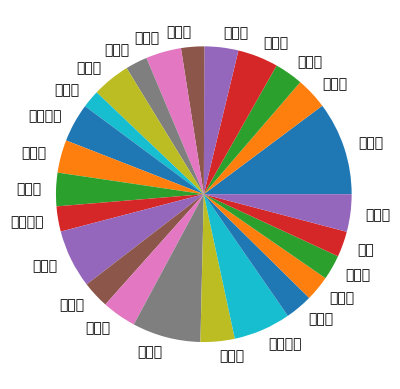

In [43]:
# import seaborn as sns
# plt.figure(figsize=(1000,100))
# sns.displot(x=road_grp2['JIJACE_NM'], y=road_grp2['ACC_CNT'], color='steelblue')
# plt.title('road accident count')
# plt.xlabel('city')
# plt.ylabel('accident count')
# plt.ylim([1000, 20000])
# plt.show()

fig, ax = plt.subplots()
ax.pie(road_grp2['ACC_CNT'].tolist(), labels=road_grp2['JIJACE_NM'])
# ax.pie(road_grp2['ACC_CNT'].tolist(), labels=gu)

In [49]:
# # data from https://allisonhorst.github.io/palmerpenguins/

# import matplotlib.pyplot as plt
# import numpy as np


# x = np.arange(len(road_grp2['JIJACE_NM']))  # the label locations
# width = 0.25  # the width of the bars
# multiplier = 0

# fig, ax = plt.subplots(figsize=(30, 20), layout='constrained')

# for attribute, measurement in road_grp['ACC_CNT'].items():
#     offset = width * multiplier
#     rects = ax.bar(x + offset, measurement, width, label=attribute)
#     ax.bar_label(rects, padding=3)
#     multiplier += 1
#     break

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('accident count')
# ax.set_title('road accident count')
# # ax.set_xticks(x + width, species)
# # ax.legend(loc='upper left', ncols=3)
# ax.set_ylim(0, 20000)

# plt.show()